#Estatística e Futebol: Aspectos do Futebol Europeu
## Grupo C
Nome: Esther Cleveston - RA 250709 \\
Nome: Felipe Basilio da Silva Santos - RA 238550 \\
Nome: Leonardo Rodrigues Pinheiro - RA 225212 \\
Nome: Marcos Vinicius de Carvalho Araujo - RA 242711 \\
Nome: Nicole Fredericci do Amaral - RA 204355 \\
Nome: Rafaela da Silva Barril -  RA 204368

##**CONFIGURAÇÃO E CARREGAMENTO DO BANCO**

In [1]:
## Instalação r2u

shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

## Preparando acesso ao Google Drive
loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
    install.packages(pkgs[!ok])
    loadPackages(pkgs[!ok])
  }
}

loadPackages(c("googledrive", "httpuv", "R.utils", "httr"))

my_check = function() TRUE
reassignInPackage("is_interactive", pkgName="httr", my_check)
options(rlang_interactive=TRUE)

40 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No

Tracing function "install.packages" in package "utils"

There are missing packages: R.utils


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save



Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, use, warnings




In [2]:
drive_auth(use_oob=TRUE, cache=FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=4b83d1668d9d3ef21e90cfbb448a847d&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVFTVGdRSFpxVXhSd2hEMmg4R3I4X0hhbm9KU0xzUFIzRUpnd0c4aUJ4bV93XzVlZEFKRzdGMlJ0X2lHVTN5TFN6X1RDdyIsInN0YXRlIjoiNGI4M2QxNjY4ZDlkM2VmMjFlOTBjZmJiNDQ4YTg0N2QifQ==


In [3]:
drive_download(as_id("14MfEJkNnCrjQf27t4mZTjuBFtzV8WeyK"))
unzip('/content/futebol.zip')

File downloaded:

• futebol.zip <id: 14MfEJkNnCrjQf27t4mZTjuBFtzV8WeyK>

Saved locally as:

• futebol.zip



In [4]:
install.packages("RSQLite")
install.packages("sf")
install.packages("maps")
install.packages("hrbrthemes")
install.packages("countrycode")

In [5]:
#Pacotes usados
library(RSQLite)
library(readr)
library(tidyverse)
library(sf)
library(maps)
library(hrbrthemes)
library(countrycode)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks R.utils::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.11.1, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE


Linked against: 3.11.1-CAPI-1.17.1 compiled against: 3.10.2-CAPI-1.16.0

It is probably a good idea to reinstall sf (and maybe lwgeom too)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




In [6]:
#Padronização dos nomes dos países
players <- read_csv('/content/players.csv')

custom_matches <- c("Crimea" = "Ukraine",
  "CSSR" = "Czech Republic",
  "England" = "United Kingdom",
  "Jugoslawien (SFR)" = "Yugoslavia",
  "Neukaledonien" = "New Caledonia",
  "Northern Ireland" = "United Kingdom",
  "Scotland" = "United Kingdom",
  "UdSSR" = "Russia",
  "Wales" = "United Kingdom"
)

players$pais_padronizado <- countrycode(players$country_of_birth, origin = "country.name", destination = "country.name.en", custom_match = custom_matches)

Rows: 32387 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (15): first_name, last_name, name, player_code, country_of_birth, city_...
dbl   (6): player_id, last_season, current_club_id, height_in_cm, market_val...
dttm  (1): contract_expiration_date
date  (1): date_of_birth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
conn <- dbConnect(SQLite(), "data")
dbWriteTable(conn, "appearances", read_csv('/content/appearances.csv'))
dbWriteTable(conn, "club_games", read_csv('/content/club_games.csv'))
dbWriteTable(conn, "clubs", read_csv('/content/clubs.csv'))
dbWriteTable(conn, "competitions", read_csv('/content/competitions.csv'))
dbWriteTable(conn, "game_events", read_csv('/content/game_events.csv'))
dbWriteTable(conn, "game_lineups", read_csv('/content/game_lineups.csv'))
dbWriteTable(conn, "games", read_csv('/content/games.csv'))
dbWriteTable(conn, "players", players)
dbWriteTable(conn, "player_valuations", read_csv('/content/player_valuations.csv'))
dbWriteTable(conn, "transfers", read_csv('/content/transfers.csv'))

Rows: 1604585 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): appearance_id, player_name, competition_id
dbl  (9): game_id, player_id, player_club_id, player_current_club_id, yellow...
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 139020 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): own_manager_name, opponent_manager_name, hosting
dbl (8): game_id, club_id, own_goals, own_position, opponent_id, opponent_go...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 439 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): club_code, name, domestic_competit

##**ANÁLISE**


###Primeira pergunta: Qual é o comportamento dos preços dos jogadores por posição ao longo do tempo?

In [8]:
gasto_capitao_geral <- dbGetQuery(conn, "
        SELECT AVG(market_value_in_eur) AS 'valor_de_mercado',
            SUBSTR(((player_valuations.date / 365) + 1970), 1, 4) AS ano,
            CASE
              WHEN position IN ('Centre-Back', 'Left-Back', 'Right-Back', 'Defender', 'Sweeper','Defensive Midfield', 'Centre Midfield',
              'Central Midfield', 'Attacking Midfield', 'Left Midfield', 'Right Midfield', 'Midfield','Goalkeeper','Right Winger', 'Left Winger')
              THEN 'Geral'
            END 'posicao'
        FROM game_lineups
        INNER JOIN player_valuations ON player_valuations.player_id = game_lineups.player_id
        WHERE team_captain = 1
            AND market_value_in_eur IS NOT NULL
            AND player_valuations.date IS NOT NULL
            AND position IS NOT NULL
        GROUP BY ano
                ")

In [9]:
gasto_capitao <- dbGetQuery(conn, "
    SELECT AVG(market_value_in_eur) AS 'valor_de_mercado',
        SUBSTR(((player_valuations.date / 365) + 1970), 1, 4) AS ano,
        CASE
            WHEN position IN ('Centre-Back', 'Left-Back', 'Right-Back', 'Defender', 'Sweeper') THEN 'Defesa'
            WHEN position IN ('Defensive Midfield', 'Centre Midfield', 'Central Midfield', 'Attacking Midfield', 'Left Midfield', 'Right Midfield', 'Midfield') THEN 'Meio de Campo'
            WHEN position IN ('Second Striker', 'Attack', 'Centre-Forward') THEN 'Atacante'
            WHEN position IN ('Goalkeeper') THEN 'Goleiro'
            WHEN position IN ('Right Winger', 'Left Winger') THEN 'Lateral'
        END AS posicao
    FROM game_lineups
    INNER JOIN player_valuations ON player_valuations.player_id = game_lineups.player_id
    WHERE team_captain = 1
        AND market_value_in_eur IS NOT NULL
        AND player_valuations.date IS NOT NULL
        AND position IS NOT NULL
    GROUP BY posicao, ano
")

In [10]:
valor_capitao <- rbind(gasto_capitao, gasto_capitao_geral)
valor_capitao$ano <- as.numeric(valor_capitao$ano)
valor_capitao$posicao <- factor(valor_capitao$posicao, levels = c("Geral", "Atacante", "Lateral", "Meio de Campo", "Defesa", "Goleiro"))

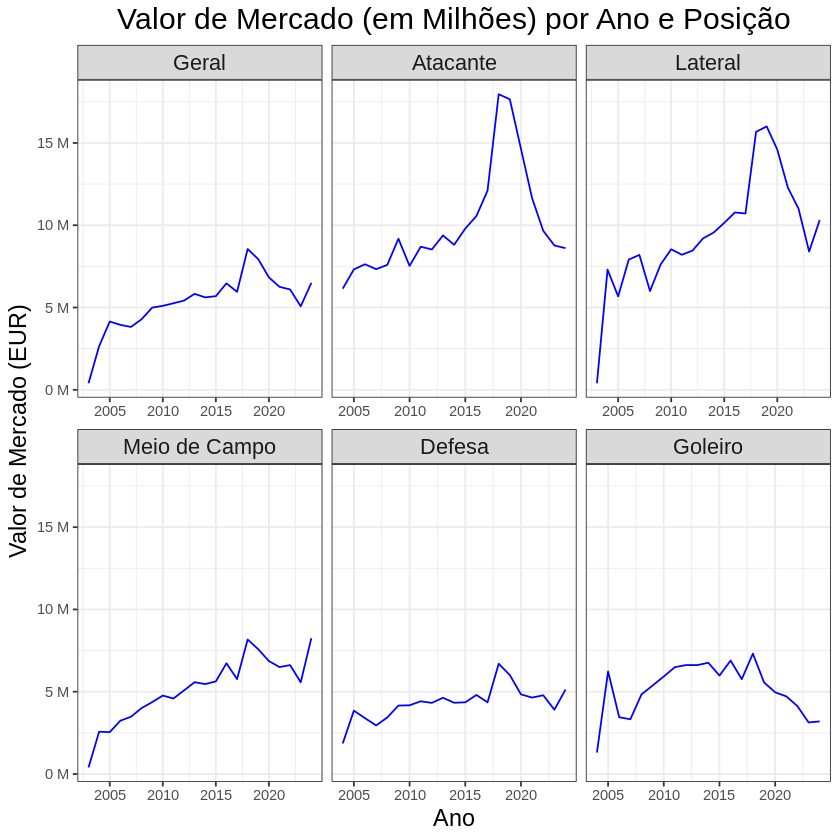

In [11]:
(grafico1 <-  ggplot(valor_capitao, aes(x = ano, y = valor_de_mercado)) +
    geom_line(color = "blue") +
    facet_wrap(~ posicao, scales = "free_x") +
    scale_x_continuous(breaks = seq(2005, 2024, by = 5)) +
    scale_y_continuous(breaks = seq(0, 15000000, by = 5000000), labels = c("0 M", "5 M", "10 M", "15 M")) +
    labs(x = "Ano", y = "Valor de Mercado (EUR)", title = "Valor de Mercado (em Milhões) por Ano e Posição")+
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 18),
    axis.title = element_text(size = 14),
    strip.text = element_text(size = 13),
    ))


###Segunda pergunta: Qual o desempenho dos jogadores de acordo com sua nacionalidade? Como o percentual de jogadores estrangeiros afeta o time?

In [12]:
(
  sql <- "SELECT clubs.name AS Clube, foreigners_percentage AS Porcentagem_Estrangeiros, SUM(is_win) AS Vitórias,
          SUM(own_goals) as Gols_Feitos, SUM(opponent_goals) AS Gols_Levados FROM clubs
          INNER JOIN club_games
          ON club_games.club_id == clubs.club_id
          INNER JOIN appearances
          ON club_games.game_id == appearances.game_id
          WHERE foreigners_percentage IS NOT NULL
          GROUP BY clubs.club_id, clubs.name
          ORDER BY Vitórias DESC
          LIMIT 5"
)

dbGetQuery(conn, sql)

[1] "SELECT clubs.name AS Clube, foreigners_percentage AS Porcentagem_Estrangeiros, SUM(is_win) AS Vitórias,\n          SUM(own_goals) as Gols_Feitos, SUM(opponent_goals) AS Gols_Levados FROM clubs\n          INNER JOIN club_games\n          ON club_games.club_id == clubs.club_id\n          INNER JOIN appearances\n          ON club_games.game_id == appearances.game_id\n          WHERE foreigners_percentage IS NOT NULL\n          GROUP BY clubs.club_id, clubs.name\n          ORDER BY Vitórias DESC\n          LIMIT 5"

Clube,Porcentagem_Estrangeiros,Vitórias,Gols_Feitos,Gols_Levados
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Real Madrid Club de Fútbol,77.3,12835,44211,18907
Futbol Club Barcelona,28.0,12721,44732,18434
FC Bayern München,60.0,12655,46045,16425
Manchester City Football Club,68.0,12094,41902,16813
Juventus Football Club,67.9,11766,33035,15270


In [13]:
#mapa
drive_download(as_id("1J4fWZxYiul8V1m8fv-TPzufzUqC1N-d6"))
#https://drive.google.com/file/d/1J4fWZxYiul8V1m8fv-TPzufzUqC1N-d6/view?usp=drive_link

drive_download(as_id("16c0zxGm4p78yapDIdWOBgD0WfDMIBtLT"))
#https://drive.google.com/file/d/16c0zxGm4p78yapDIdWOBgD0WfDMIBtLT/view?usp=drive_link
unzip("/content/countries_cont.zip")

File downloaded:

• countries.lat.long.csv <id: 1J4fWZxYiul8V1m8fv-TPzufzUqC1N-d6>

Saved locally as:

• countries.lat.long.csv

File downloaded:

• countries_cont.zip <id: 16c0zxGm4p78yapDIdWOBgD0WfDMIBtLT>

Saved locally as:

• countries_cont.zip



In [14]:
dbWriteTable(conn, "locations", read_csv("/content/countries.lat.long.csv"))
dbWriteTable(conn, "continents", read_csv("/content/Countries by continents.csv"))

Rows: 245 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): country, latitude, longitude, name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Continent, Country

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
sql <- "SELECT latitude, longitude, continent,
        AVG(minutes_played + 50 * goals - 10 * yellow_cards - 20 * red_cards) AS desempenho,
        pais_padronizado from appearances
        INNER JOIN players
        ON players.player_id == appearances.player_id AND players.name == appearances.player_name
        INNER JOIN continents ON players.pais_padronizado == continents.Country
        INNER JOIN locations ON locations.name == players.pais_padronizado
        WHERE pais_padronizado IS NOT NULL
        GROUP BY pais_padronizado
        HAVING SUM(minutes_played) > 2000
        "

desempenho <- dbGetQuery(conn, sql)

In [16]:
#Países cujo nome aparece diferente no banco "maps"
desempenho$pais_padronizado[desempenho$pais_padronizado == "United States"] <- "USA"
desempenho$pais_padronizado[desempenho$pais_padronizado == "United Kingdom"] <- "UK"

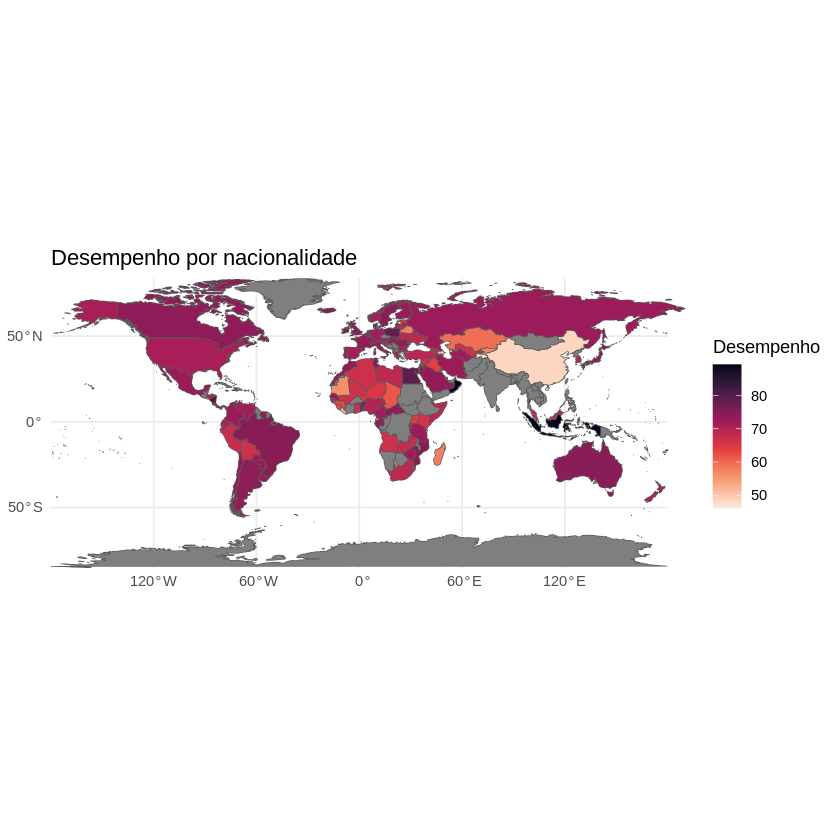

In [17]:
world  <- st_as_sf(map("world", fill = TRUE, plot = FALSE))

# join entre os dados analisados e geometria dos paises
dados_mapa <- left_join(world, desempenho, by = c("ID" = "pais_padronizado" ))

dados_mapa <- st_as_sf(dados_mapa)

ggplot() +
   geom_sf(data = dados_mapa, aes(fill= desempenho)) +
   scale_fill_viridis_c(option ="rocket", direction = -1,name= "Desempenho") +
   labs(title = "Desempenho por nacionalidade")+
   theme_minimal()+
  coord_sf(expand = FALSE)

###Terceira pergunta: Qual o tempo médio que um jogador permanece no mesmo time? Isso muda de acordo com seu valor de mercado?


In [18]:
#valor das transferências
(  valor <- dbGetQuery(conn, "SELECT transfers.player_id
                                  , transfers.player_name
                                  , AVG(transfer_fee) AS value

                                  FROM transfers LEFT JOIN players
                                  ON transfers.player_id = players.player_id
                                  AND transfers.market_value_in_eur = players.market_value_in_eur

                                  WHERE transfer_fee IS NOT NULL
                                  AND transfer_fee != 0
                                  AND transfers.market_value_in_eur IS NOT NULL
                                  GROUP BY transfers.player_id

                                  ORDER BY value DESC")
)

player_id,player_name,value
<dbl>,<chr>,<dbl>
342229,Kylian Mbappé,180000000
203460,Jack Grealish,117500000
357662,Declan Rice,116600000
122153,Paul Pogba,105000000
487969,Randal Kolo Muani,95000000
132098,Harry Kane,95000000
462250,João Félix,89600000
648195,Enzo Fernández,82625000
192279,Kepa Arrizabalaga,80000000


In [19]:
#jogadores com mais transferências (muitos não têm o valor de transfer_fee)
(  transferencias <- dbGetQuery(conn, "SELECT transfers.player_id
                                      , transfers.player_name
                                      , COUNT(*) AS numero_transferencias

                                      FROM transfers LEFT JOIN players
                                      ON transfers.player_id = players.player_id

                                      WHERE transfers.player_id IS NOT NULL
                                      AND transfer_date IS NOT NULL
                                      AND player_name IS NOT NULL
                                      GROUP BY transfers.player_id

                                      ORDER BY numero_transferencias DESC, player_name")
)

player_id,player_name,numero_transferencias
<dbl>,<chr>,<int>
124560,Samuele Longo,35
173835,Esmaël Gonçalves,33
61838,Jonathan Obika,29
229817,Ali Sowe,28
233998,Freddie Ladapo,28
329723,Gil Dias,28
130394,Gianluca Lapadula,27
238367,Cassiano,26
44059,Ervin Zukanovic,26


In [20]:
#Média de tempo (em anos) para cada jogador
(
  tempo_de_clube <- dbGetQuery(conn, "WITH tempo_por_clube AS

                                      (
                                        SELECT transfers.player_name
                                        , players.player_id
                                        , JULIANDAY(transfer_date/365 + 1970) - JULIANDAY(LAG(transfer_date/365 + 1970) OVER (ORDER BY players.player_id, transfer_date)) AS tempo_no_time
                                        , from_club_name
                                        , to_club_name
                                        , ROW_NUMBER() OVER (PARTITION BY players.player_id ORDER BY players.player_id) AS row_num

                                        FROM players INNER JOIN transfers
                                        ON players.player_id = transfers.player_id

                                        WHERE transfers.player_name IS NOT NULL
                                        AND players.player_id IS NOT NULL

                                        ORDER BY players.player_id, transfer_date
                                      )

                                      SELECT player_name
                                      , player_id
                                      , AVG(tempo_no_time) AS tempo_medio
                                      FROM tempo_por_clube

                                      WHERE row_num > 1
                                      GROUP BY player_id

                                      ORDER BY tempo_medio DESC")
)

player_name,player_id,tempo_medio
<chr>,<dbl>,<dbl>
Guilherme,55369,10.756164
Anton Shunin,37549,10.256164
Volodymyr Chesnakov,58930,9.506849
Lewis Stevenson,42547,9.506849
Etienne Vaessen,387197,9.008219
Benjamin Hvidt,400544,7.969863
Gabriel Suazo,385105,7.550685
Kevin Vázquez,221315,7.005479
Tom Vandenberghe,387990,6.884932


In [21]:
(  preco_jogador_tempo <- tempo_de_clube %>%
                            inner_join(valor, by = "player_id") %>%
                            inner_join(transferencias, by = "player_id") %>%
                            select(player_id, player_name, numero_transferencias, value, tempo_medio) %>%
                            arrange(desc(tempo_medio))
)

player_id,player_name,numero_transferencias,value,tempo_medio
<dbl>,<chr>,<int>,<dbl>,<dbl>
181579,James Ward-Prowse,3,34800000,6.564384
109217,Edin Visca,3,2350000,6.187671
110695,Ömer Ali Şahiner,3,1000000,6.090411
316884,Dominik Greif,2,2500000,6.019178
284843,Roman Ezhov,2,200000,5.975342
461019,Samuele Birindelli,2,1600000,5.682192
39259,Makoto Hasebe,5,2500000,5.606849
657796,Alaa Ghram,2,2000000,5.501370
218087,Ben Osborn,3,3900000,5.252055


In [22]:
#Limitar a quantidade de transferência para melhorar a visualização, há poucos dados com grandes quantidades de transferências
transf_18 <- preco_jogador_tempo %>% filter(numero_transferencias < 18)

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


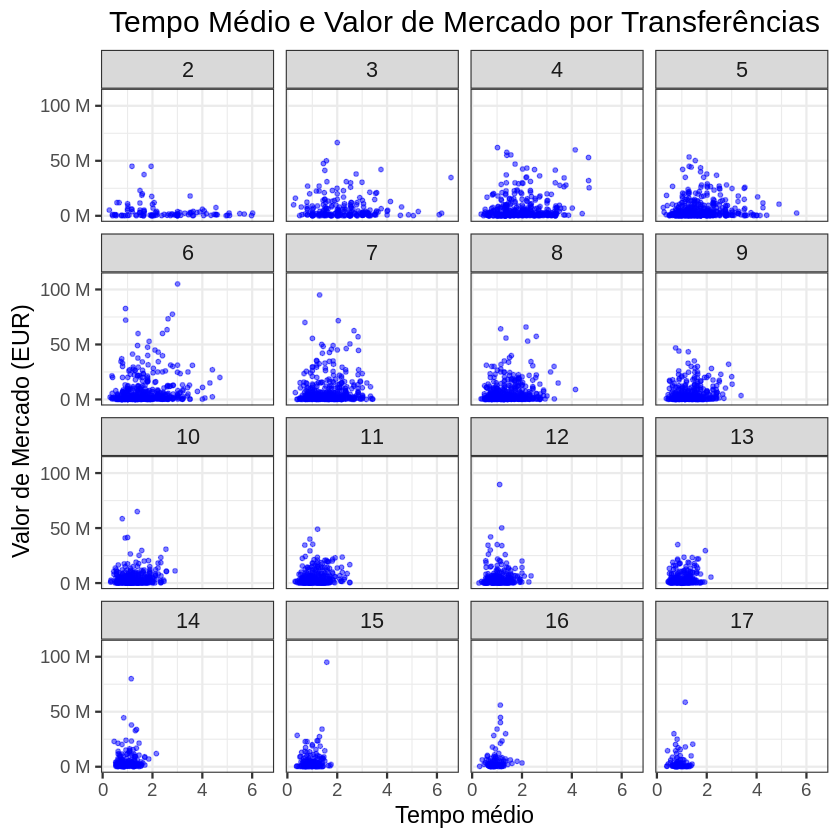

In [23]:
ggplot(transf_18, aes(x=tempo_medio, y=value)) +
  geom_point(stat="identity", color="blue", alpha=0.5, size=1 ) +
  facet_wrap("numero_transferencias") +
  scale_x_continuous(breaks = seq(0, 8, by = 2)) +
  labs(x = "Tempo médio", y = "Valor de Mercado (EUR)", title = "Tempo Médio e Valor de Mercado por Transferências")+
  scale_y_continuous(breaks = seq(0, 110000000, by = 50000000), labels = c("0 M", "50 M", "100 M"), limits = c(0, 110000000)) +
  theme_bw(base_size = 14) +
  theme(plot.title = element_text(hjust = 0.5, size = 18), axis.title = element_text(size = 14), strip.text = element_text(size = 13))

#limitamos o eixo y a 110000000 para melhorar a visualização levando em conta que apenas outliers estavam acima desse valor.